In [179]:
from pathlib import Path
import pandas as pd
from scipy.stats import skew, kurtosis
import numpy as np, matplotlib.pyplot as plt, seaborn as sns
from typing import Literal
from sklearn.preprocessing import MinMaxScaler,StandardScaler

data_path = Path("../data/processed/S&P500_stock_hist_5y.parquet")
df = pd.read_parquet(data_path)

In [180]:
df.head()

Price,date,adj close,close,high,low,open,volume,ticker,daily_rtn,excess_return
1,2020-08-20,112.342766,136.262543,136.839462,135.769226,136.304352,2380399,MMM,-0.006098,-0.009257
2,2020-08-21,112.488815,135.209030,136.028427,134.397995,134.556854,2398698,MMM,0.001300,-0.002141
3,2020-08-24,113.754845,136.730774,137.081940,134.740799,135.075256,3114862,MMM,0.011255,0.001211
4,2020-08-25,113.455742,136.371231,138.168900,135.802673,137.842804,2318446,MMM,-0.002629,-0.006226
5,2020-08-26,114.012230,137.040131,137.767563,135.192307,136.178925,2994066,MMM,0.004905,-0.005291


In [181]:
#reuseable function
def standardize_bygroup(df:pd.DataFrame,columns=None):
    df_copy = df.copy()
    if columns is None:
        columns = df_copy.select_dtypes(include=np.number).columns
    df_copy[columns] = StandardScaler().fit_transform(df_copy[columns])
    return df_copy

## 1.First Look

In [182]:
df = df[df['ticker'].isin(['NVDA'])]
df = df.groupby('ticker', group_keys=False).apply(standardize_bygroup)
df = df.reset_index(drop=True)
df

/var/folders/_c/nw4dwm9s52v5kb_3mvq2jn640000gn/T/ipykernel_74045/352355158.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('ticker', group_keys=False).apply(standardize_bygroup)


Price,date,adj close,close,high,low,open,volume,ticker,daily_rtn,excess_return
0,2020-08-20,-0.875045,-0.874907,-0.875951,-0.873807,-0.877707,2.735110,NVDA,-0.075411,-0.190512
1,2020-08-21,-0.863888,-0.863712,-0.867141,-0.867156,-0.873030,3.158076,NVDA,1.263957,1.464821
2,2020-08-24,-0.863133,-0.862954,-0.865034,-0.860595,-0.858963,0.413194,NVDA,0.005626,-0.347600
3,2020-08-25,-0.862521,-0.862340,-0.868106,-0.859202,-0.864182,-0.672721,NVDA,-0.011180,-0.127015
4,2020-08-26,-0.862048,-0.861865,-0.865928,-0.857017,-0.860706,-0.499353,NVDA,-0.027294,-0.394235
...,...,...,...,...,...,...,...,...,...,...
1249,2025-08-12,2.654483,2.654127,2.619434,2.647740,2.648886,-1.446598,NVDA,0.100329,-0.278564
1250,2025-08-13,2.622088,2.621729,2.609077,2.645428,2.641873,-1.261276,NVDA,-0.339741,-0.521963
1251,2025-08-14,2.630961,2.630602,2.589783,2.647740,2.582679,-1.532462,NVDA,-0.010307,-0.002581
1252,2025-08-15,2.598566,2.598205,2.567036,2.617900,2.626611,-1.386686,NVDA,-0.341358,-0.294478


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1254 non-null   datetime64[ns]
 1   adj close      1254 non-null   float64       
 2   close          1254 non-null   float64       
 3   high           1254 non-null   float64       
 4   low            1254 non-null   float64       
 5   open           1254 non-null   float64       
 6   volume         1254 non-null   float64       
 7   ticker         1254 non-null   object        
 8   daily_rtn      1254 non-null   float64       
 9   excess_return  1254 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 98.1+ KB


In [184]:
df.isna().sum()

Price
date             0
adj close        0
close            0
high             0
low              0
open             0
volume           0
ticker           0
daily_rtn        0
excess_return    0
dtype: int64

## 2.Numeric Profile

In [185]:
desc = df[['adj close','high','low','open',"volume","daily_rtn","excess_return"]].describe().T
desc['skew'] = [skew(df[c].dropna()) for c in desc.index]
desc['kurtosis'] = [kurtosis(df[c].dropna()) for c in desc.index]
desc.reset_index()

,Price,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
0,adj close,1254.0,0.000000e+00,1.000399,-0.893346,-0.776786,-0.553212,0.821348,2.654483,0.974634,-0.527720
1,high,1254.0,0.000000e+00,1.000399,-0.888949,-0.779419,-0.553556,0.816637,2.619434,0.965037,-0.564980
2,low,1254.0,-4.532968e-17,1.000399,-0.896203,-0.779045,-0.551448,0.804694,2.671485,0.984527,-0.491375
3,open,1254.0,9.065936e-17,1.000399,-0.898414,-0.780128,-0.553685,0.808137,2.648886,0.975268,-0.528213
4,volume,1254.0,5.666210e-17,1.000399,-1.703146,-0.781111,-0.098521,0.582049,6.090183,1.049780,2.395723
5,daily_rtn,1254.0,-2.266484e-17,1.000399,-5.191303,-0.556812,0.011769,0.568818,7.256910,0.469694,4.279331
6,excess_return,1254.0,-2.833105e-18,1.000399,-5.889252,-0.598563,-0.043283,0.522833,8.719753,0.738503,6.946305


## 3.Distribution

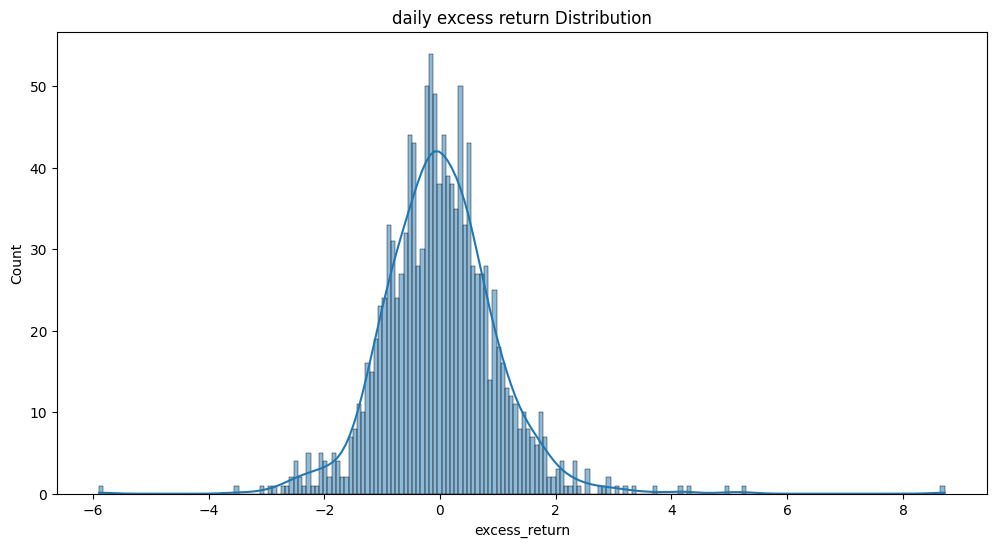

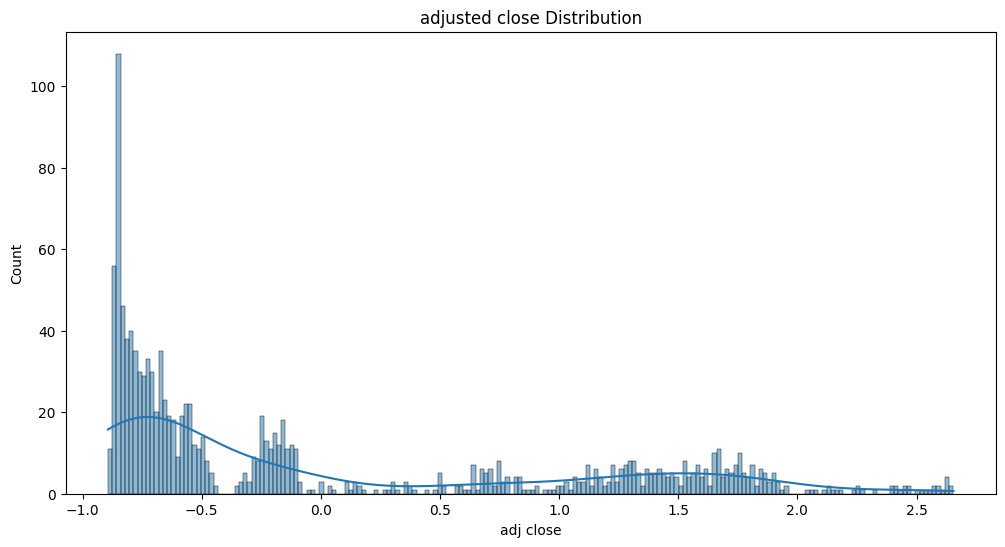

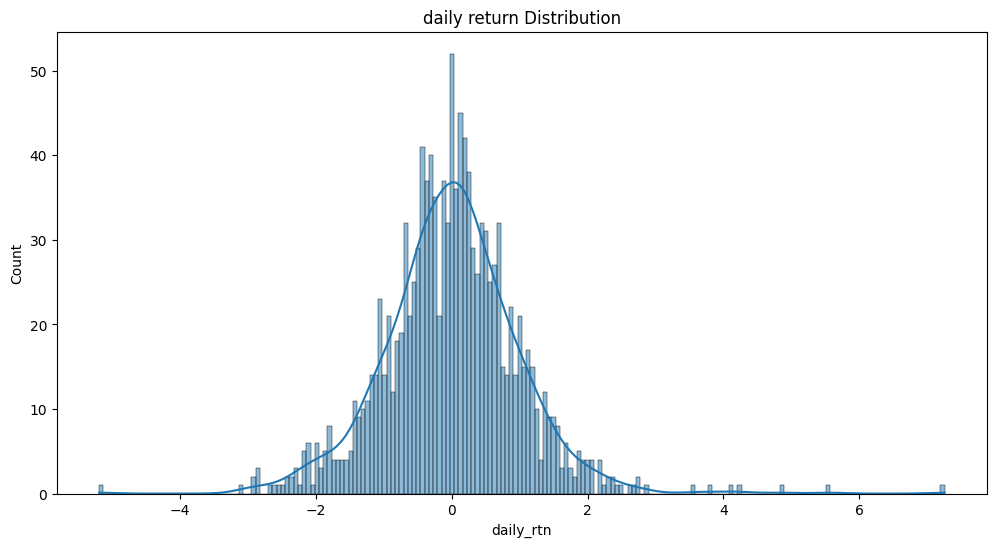

In [186]:
#histogram plot
plt.figure(figsize=(12,6))
sns.histplot(df['excess_return'], kde=True,bins = 200)
plt.title('daily excess return Distribution')


plt.figure(figsize=(12,6))
sns.histplot(df['adj close'], kde=True,bins = 200)
plt.title('adjusted close Distribution')


plt.figure(figsize=(12,6))
sns.histplot(df['daily_rtn'], kde=True,bins = 200)
plt.title('daily return Distribution')

plt.show()

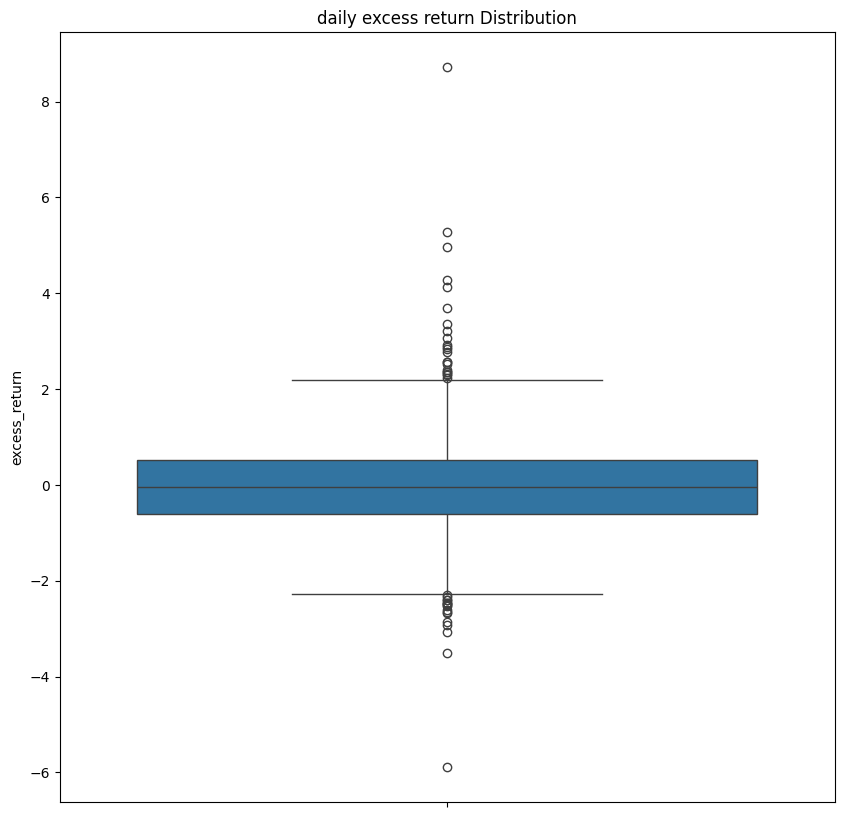

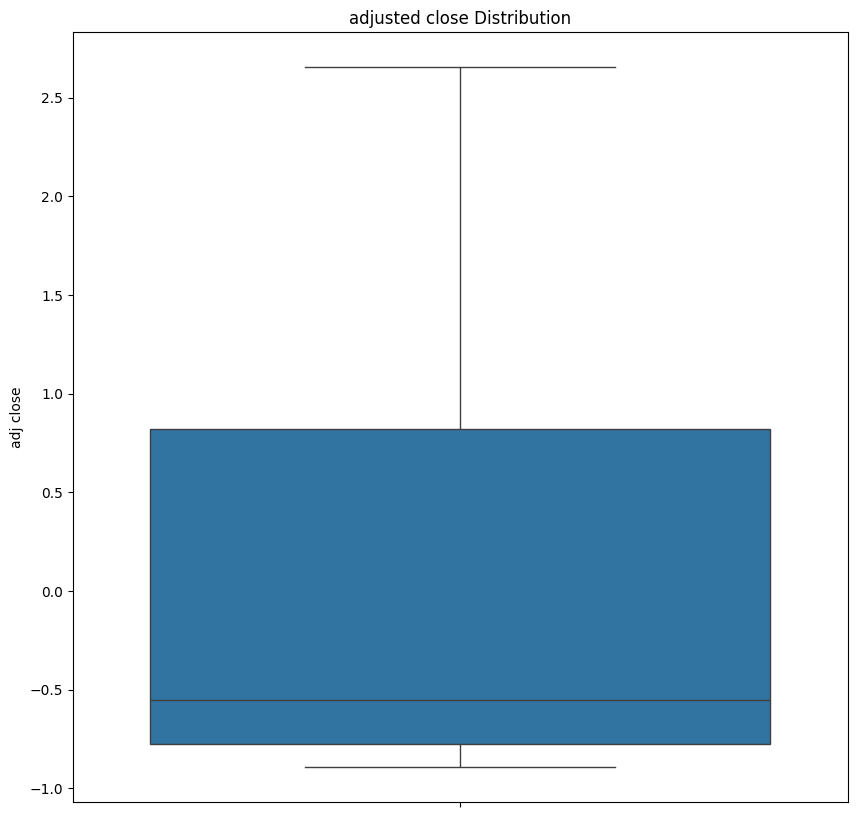

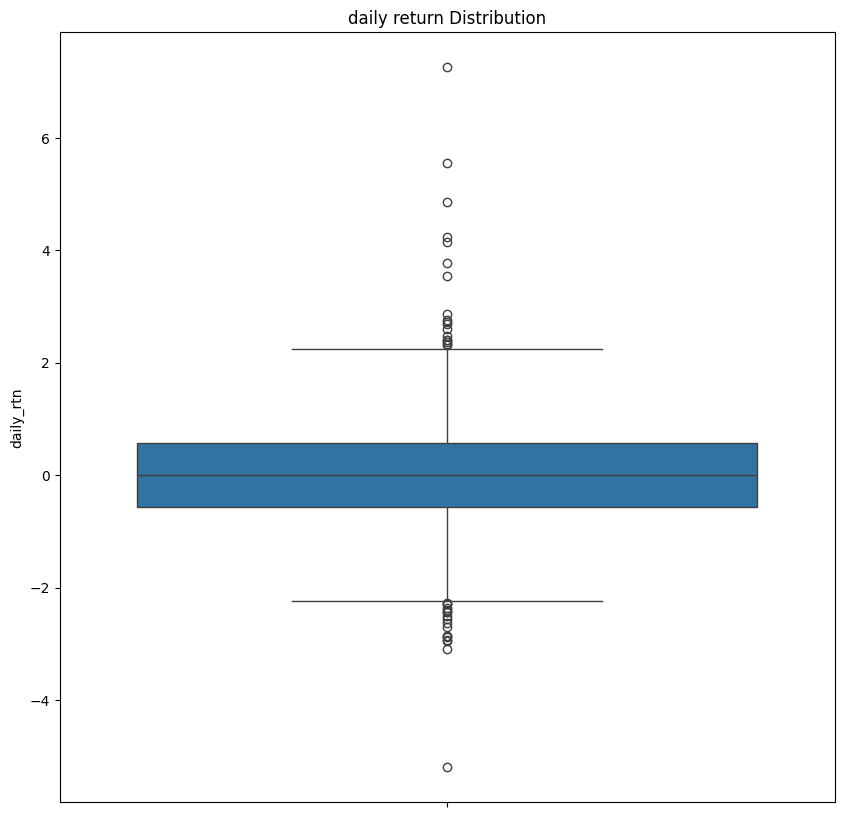

In [187]:
#boxplot
plt.figure(figsize=(10,10))
sns.boxplot(df['excess_return'])
plt.title('daily excess return Distribution')


plt.figure(figsize=(10,10))
sns.boxplot(df['adj close'])
plt.title('adjusted close Distribution')


plt.figure(figsize=(10,10))
sns.boxplot(df['daily_rtn'])
plt.title('daily return Distribution')

plt.show()

# 4.Relationship

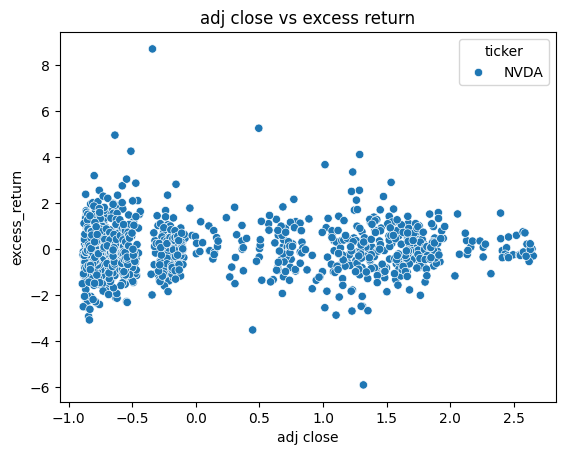

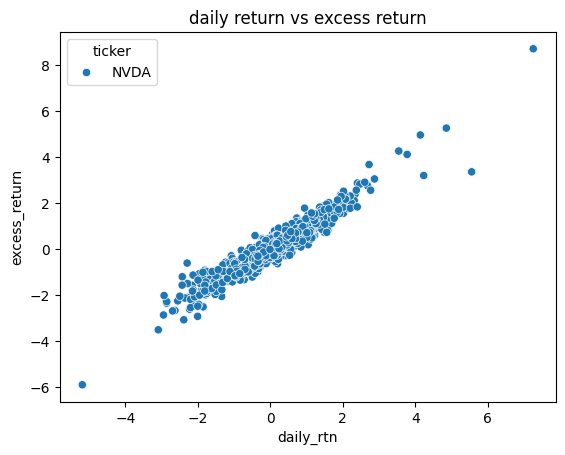

In [188]:
sns.scatterplot(data=df, x='adj close', y='excess_return',hue="ticker")
plt.title('adj close vs excess return')
plt.show()

sns.scatterplot(data=df, x='daily_rtn', y='excess_return',hue="ticker")
plt.title('daily return vs excess return')
plt.show()

## 5.Correlation Matrix

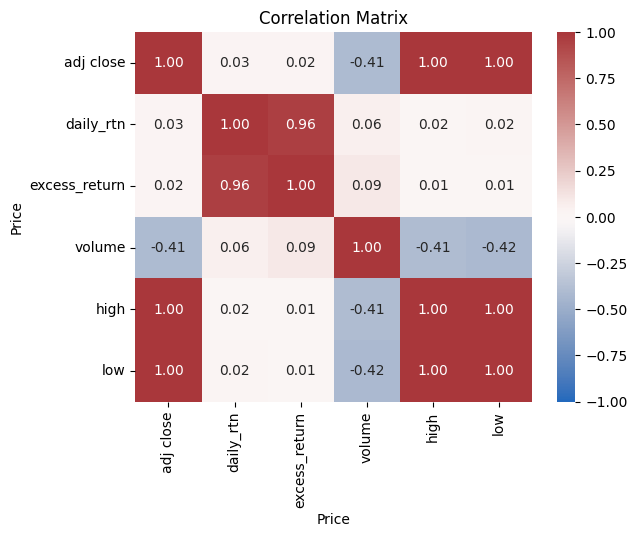

Price,adj close,daily_rtn,excess_return,volume,high,low
Price,,,,,,
adj close,1.000000,0.028654,0.023886,-0.411355,0.999630,0.999715
daily_rtn,0.028654,1.000000,0.956276,0.055895,0.015362,0.018409
excess_return,0.023886,0.956276,1.000000,0.094358,0.011387,0.013953
volume,-0.411355,0.055895,0.094358,1.000000,-0.405478,-0.415921
high,0.999630,0.015362,0.011387,-0.405478,1.000000,0.999545
low,0.999715,0.018409,0.013953,-0.415921,0.999545,1.000000


In [189]:
corr = df[['adj close','daily_rtn','excess_return','volume',"high","low"]].corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
corr

## 6. Insights & Assumptions

**1. Insights:**
- both daily return and excess return are heavily tailed. 
- The outliers disrupt the distribution of the data, and need to exclude from the future analysis
- The correlation between adjusted price and excess return are low

**2. Assumptions & Risks:** I assume outliers in the dataset are noise and disrupt the distributio of the data. But we might miss some important events and information after excluding the outliers. Since my dataset contains the past 5 years OHLCV of all the S&P500 stocks, we assume all stocks's adjusted price has low correation with excess return, and need to construct new features to build the model. However, if some stocks' adjusted price has correation with excess return, it might reduce the predictive power of the model. 

**3.Next step:**
- cleaning and process the data first
- construct new features like momentum factors and volatility factor. 
- normalize the data groupby different tickers